In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from collections import Counter
vocab=Counter()
import re

In [2]:
f = open('/content/drive/My Drive/NER/sentence_words_tag.txt', 'r')
#f = open('/content/drive/My Drive/NER/word_tagging_no_num.txt', 'r', encoding='cp949')

# 텍스트파일에서 앞에 인덱스가 없어야됨 ㅠㅠ

sentences = []
sentence = []
ner_set = set()
# 파이썬의 set은 중복을 허용하지 않는다. 개체명 태깅의 경우의 수. 즉, 종류를 알아내기 위함이다.  

for line in f:
    if len(line)==0 or line.startswith('-DOCSTART') or line[0]=="\n":
        if len(sentence) > 0:
            sentences.append(sentence)
            sentence=[]
        continue
    splits = line.split('\t')
    # 공백을 기준으로 속성을 구분한다.
    
#     splits[0] = re.sub('[0-9]', '', splits[0])
    
    splits[-1] = re.sub(r'\n', '', splits[-1])
    # 개체명 태깅 뒤에 붙어있는 줄바꿈 표시 \n을 제거한다.
    
    word=splits[0].upper()
    
    vocab[word]=vocab[word]+1
    # 단어마다 빈도 수가 몇 인지 기록한다.
    
    sentence.append([word, splits[-1]])
    # 단어와 개체명 태깅만 기록한다.
    
    ner_set.add(splits[-1])
    # set에다가 개체명 태깅을 집어 넣는다. 중복은 허용되지 않으므로
    # 나중에 개체명 태깅이 어떤 종류가 있는지 확인할 수 있다.

print(len(sentences))

8192


In [3]:
sentences[:3]

[[['대복', 'PRD_B'], [' ', 'PRD_I'], ['포기김치', 'PRD_I'], [' ', '-'], ['팔아', '-']],
 [['자연송이', 'PRD_B'],
  [' ', 'PRD_I'],
  ['투뿔', 'PRD_I'],
  [' ', 'PRD_I'],
  ['한우', 'PRD_I'],
  [' ', 'PRD_I'],
  ['불고기', 'PRD_I'],
  ['와', '-'],
  [' ', '-'],
  ['캔디', 'PRD_B'],
  [' ', '-'],
  ['사탕', 'PRDG_B'],
  [' ', '-'],
  ['있어', '-']],
 [['권기옥명인', 'PRD_B'],
  [' ', 'PRD_I'],
  ['깻잎장아찌', 'PRD_I'],
  [' ', '-'],
  ['재고', '-'],
  [' ', '-'],
  ['있어', '-']]]

In [4]:
vocab

Counter({'대복': 22,
         ' ': 67344,
         '포기김치': 99,
         '팔아': 118,
         '자연송이': 10,
         '투뿔': 10,
         '한우': 20,
         '불고기': 54,
         '와': 654,
         '캔디': 98,
         '사탕': 650,
         '있어': 1200,
         '권기옥명인': 12,
         '깻잎장아찌': 4,
         '재고': 252,
         '페이장': 4,
         '치즈': 590,
         '남았어': 152,
         '일본': 6,
         '커피사탕': 12,
         '스미야키': 6,
         '존재해': 148,
         '핫스패니쉬살라미': 12,
         '물건': 184,
         '200G': 18,
         '그릴': 8,
         '닭가슴살': 166,
         '팔긴': 4,
         '해': 4,
         '씨제이': 406,
         '다담': 32,
         '냉이된장찌개': 10,
         '양념': 178,
         '과': 406,
         '2700G': 20,
         '김치': 374,
         '20G': 16,
         '재고품': 124,
         '임실': 4,
         '매일': 70,
         '아몬드브리즈': 10,
         '언스위트': 8,
         '살': 1044,
         '수': 3292,
         '도들샘': 12,
         '가마소테누룽지': 6,
         '진열되어': 4,
         '무말랭이': 14,
         '피클': 20,
         

In [5]:
len(vocab)

2654

In [6]:
print(set(ner_set))

{'PRD_I', 'PRDG_B', 'PRD_B', '-'}


In [7]:
vocab_sorted=sorted(vocab.items(), key=lambda x:x[1], reverse=True)
# vocab을 빈도수 순으로 정렬한다.
vocab_sorted
# 출력

[(' ', 67344),
 ('가장', 5160),
 ('어느', 4108),
 ('는', 3932),
 ('있는지', 3704),
 ('수', 3292),
 ('은', 2934),
 ('싼', 2580),
 ('저렴한', 2580),
 ('어디', 1548),
 ('있어', 1200),
 ('살', 1044),
 ('구역에서', 1032),
 ('알려줘', 936),
 ('확인해줘', 936),
 ('검색해줘', 936),
 ('찾아줘', 935),
 ('말해줘', 827),
 ('랑', 750),
 ('알아', 719),
 ('안내해줘', 719),
 ('찾을', 656),
 ('구할', 656),
 ('볼', 656),
 ('진열', 656),
 ('와', 654),
 ('판매하고', 654),
 ('과자', 653),
 ('사탕', 650),
 ('파는지', 632),
 ('피코크', 604),
 ('치즈', 590),
 ('위치하는지', 560),
 ('되어있는지', 560),
 ('아이스크림', 550),
 ('어디에서', 516),
 ('구역에', 516),
 ('장소에서', 516),
 ('위치에서', 516),
 ('쯤에서', 516),
 ('쪽에서', 516),
 ('진열대에서', 514),
 ('우유', 458),
 ('씨제이', 406),
 ('과', 406),
 ('이랑', 376),
 ('김치', 374),
 ('몇', 360),
 ('개', 360),
 ('수량', 300),
 ('얼마나', 300),
 ('남은', 300),
 ('어디에', 258),
 ('장소에', 258),
 ('위치에', 258),
 ('쯤에', 258),
 ('쪽에', 258),
 ('진열대에', 258),
 ('재고', 252),
 ('정도', 240),
 ('얼마에', 225),
 ('어느정도에', 225),
 ('삼립', 186),
 ('구매할', 186),
 ('물건', 184),
 ('상품', 184),
 ('물품', 180),
 ('양념', 17

In [8]:
word_to_index = {w: i + 2 for i, (w, n) in enumerate(vocab_sorted)} # if n > 5
word_to_index['PAD'] = 0  # 패딩을 위해 인덱스 0 할당
word_to_index['OOV'] = 1  # 모르는 단어을 위해 인덱스 1 할당
word_to_index # 출력

{' ': 2,
 '가장': 3,
 '어느': 4,
 '는': 5,
 '있는지': 6,
 '수': 7,
 '은': 8,
 '싼': 9,
 '저렴한': 10,
 '어디': 11,
 '있어': 12,
 '살': 13,
 '구역에서': 14,
 '알려줘': 15,
 '확인해줘': 16,
 '검색해줘': 17,
 '찾아줘': 18,
 '말해줘': 19,
 '랑': 20,
 '알아': 21,
 '안내해줘': 22,
 '찾을': 23,
 '구할': 24,
 '볼': 25,
 '진열': 26,
 '와': 27,
 '판매하고': 28,
 '과자': 29,
 '사탕': 30,
 '파는지': 31,
 '피코크': 32,
 '치즈': 33,
 '위치하는지': 34,
 '되어있는지': 35,
 '아이스크림': 36,
 '어디에서': 37,
 '구역에': 38,
 '장소에서': 39,
 '위치에서': 40,
 '쯤에서': 41,
 '쪽에서': 42,
 '진열대에서': 43,
 '우유': 44,
 '씨제이': 45,
 '과': 46,
 '이랑': 47,
 '김치': 48,
 '몇': 49,
 '개': 50,
 '수량': 51,
 '얼마나': 52,
 '남은': 53,
 '어디에': 54,
 '장소에': 55,
 '위치에': 56,
 '쯤에': 57,
 '쪽에': 58,
 '진열대에': 59,
 '재고': 60,
 '정도': 61,
 '얼마에': 62,
 '어느정도에': 63,
 '삼립': 64,
 '구매할': 65,
 '물건': 66,
 '상품': 67,
 '물품': 68,
 '양념': 69,
 '닭가슴살': 70,
 '남았어': 71,
 '노브랜드': 72,
 '존재해': 73,
 '팔고': 74,
 '프랑스': 75,
 '재고품': 76,
 '동원': 77,
 '남았는지': 78,
 '팔아': 79,
 '오리지널': 80,
 '미니': 81,
 '파운드': 82,
 '풀무원': 83,
 '프리미엄': 84,
 '종가집': 85,
 '포기김치': 86,
 '캔디': 87,
 '비비고

In [9]:
print(len(word_to_index))

2656


### word_to_index를 통해 단어를 입력하면, 인덱스를 리턴

In [10]:
word_to_index['우유']
word_to_index['빼빼로']

2320

### ner_to_index에다가 개체명 태깅을 입력하면 인덱스를 리턴

In [11]:
ner_to_index={}
ner_to_index['PAD'] = 0
i=1
for ner in ner_set:
    ner_to_index[ner]=i
    i=i+1
print(ner_to_index)

{'PAD': 0, 'PRD_I': 1, 'PRDG_B': 2, 'PRD_B': 3, '-': 4}


In [12]:
ner_to_index['PRD_B']

3

### 훈련데이터 data_X 생성

In [13]:
print(len(sentences))

8192


In [14]:
data_X = []

for s in sentences:
    temp_X = []
    for w, label in s:
        try:
            temp_X.append(word_to_index.get(w,1))
        except KeyError:
            temp_X.append(word_to_index['OOV'])

    data_X.append(temp_X)
print(len(data_X))

8192


In [15]:
index_to_word={}
for key, value in word_to_index.items(): # 인덱스를 단어로 바꾸기 위해 index_to_word를 생성
    index_to_word[value] = key

temp = []
for index in data_X[0] : # 첫번째 샘플 안의 인덱스들에 대해서
    temp.append(index_to_word[index]) # 다시 단어로 변환

print(sentences[0])    
print(temp)

[['대복', 'PRD_B'], [' ', 'PRD_I'], ['포기김치', 'PRD_I'], [' ', '-'], ['팔아', '-']]
['대복', ' ', '포기김치', ' ', '팔아']


### 태깅된 부분을 data_y로 저장

In [0]:
data_y = []

for s in sentences:
    temp_y = []
    for w, label in s:
            temp_y.append(ner_to_index.get(label))

    data_y.append(temp_y)

In [17]:
print(data_X[:4]) # X 데이터 4개만 출력
print(data_y[:4]) # y 데이터 4개만 출력
# {'PAD': 0, 'PRD_B': 1, 'PRDG_I': 2, 'PRDG_B': 3, 'PRD_I': 4, '-': 5}

[[260, 2, 86, 2, 79], [596, 2, 597, 2, 298, 2, 121, 27, 2, 87, 2, 30, 2, 12], [478, 2, 1576, 2, 60, 2, 12], [1577, 2, 33, 2, 60, 2, 71]]
[[3, 1, 1, 4, 4], [3, 1, 1, 1, 1, 1, 1, 4, 4, 3, 4, 2, 4, 4], [3, 1, 1, 4, 4, 4, 4], [3, 4, 2, 4, 4, 4, 4]]


### 각 sample의 갯수 파악

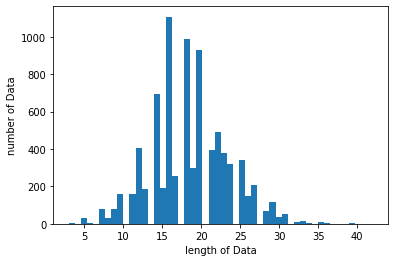

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist([len(s) for s in data_X], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [19]:
print(max(len(l) for l in data_X)) # 전체 데이터에서 길이가 가장 긴 샘플의 길이 출력
print(max(len(l) for l in data_y)) # 전체 데이터에서 길이가 가장 긴 샘플의 길이 출력

42
42


In [20]:
max_len=70
from keras.preprocessing.sequence import pad_sequences
pad_X = pad_sequences(data_X, padding='post', maxlen=max_len)
# data_X의 모든 샘플들의 길이를 맞출 때 뒤의 공간에 숫자 0으로 채움.
pad_y = pad_sequences(data_y, padding='post', maxlen=max_len)
# data_y의 모든 샘플들의 길이를 맞출 때 뒤의 공간에 숫자0으로 채움.

Using TensorFlow backend.


In [21]:
print(min(len(l) for l in pad_X)) # 모든 데이터에서 길이가 가장 짧은 샘플의 길이 출력
print(min(len(l) for l in pad_y)) # 모든 데이터에서 길이가 가장 짧은 샘플의 길이 출력

70
70


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pad_X, pad_y, test_size=.2, random_state=777)

In [23]:
len(pad_X)

8192

In [24]:
print(len(X_train), len(X_test), len(y_train), len(y_test))
print(y_train[0][0],y_test[0][0])

6553 1639 6553 1639
4 4


### 모델 설계

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Bidirectional, TimeDistributed
from keras.optimizers import Adam

In [0]:
n_words = len(word_to_index)
n_labels = len(ner_to_index)

In [27]:
print(n_words)
print(n_labels)

2656
5


In [28]:
model = Sequential()
model.add(Embedding(input_dim=n_words, output_dim=16, input_length=max_len, mask_zero=True))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(TimeDistributed(Dense(n_labels, activation='softmax')))




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [29]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])

### 원-핫 인코딩

In [30]:
from keras.utils import np_utils
y_train2 = np_utils.to_categorical(y_train)
y_test2 = np_utils.to_categorical(y_test,num_classes=n_labels)
print(len(y_train[0]), len(y_train2[0][0]),len(y_test[0]),len(y_test2[0][0]))

70 5 70 5


In [31]:
model.fit(X_train, y_train2, epochs=8)




Epoch 1/8





6553/6553 [==============================] - 61s 9ms/step - loss: 0.7859 - acc: 0.7371
Epoch 2/8
6553/6553 [==============================] - 59s 9ms/step - loss: 0.2679 - acc: 0.8973
Epoch 3/8
6553/6553 [==============================] - 60s 9ms/step - loss: 0.0759 - acc: 0.9821
Epoch 4/8
6553/6553 [==============================] - 60s 9ms/step - loss: 0.0288 - acc: 0.9951
Epoch 5/8
6553/6553 [==============================] - 59s 9ms/step - loss: 0.0152 - acc: 0.9976
Epoch 6/8
6553/6553 [==============================] - 59s 9ms/step - loss: 0.0095 - acc: 0.9986
Epoch 7/8
6553/6553 [==============================] - 59s 9ms/step - loss: 0.0067 - acc: 0.9990
Epoch 8/8
6553/6553 [==============================] - 59s 9ms/step - loss: 0.0053 - acc: 0.9991


In [32]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test2)[1]))

1639/1639 [==============================] - 6s 3ms/step

 테스트 정확도: 0.9980


### 실제값과 예측값 비교

In [33]:
import numpy as np

index_to_word={}
for key, value in word_to_index.items():
    index_to_word[value] = key

index_to_ner={}
for key, value in ner_to_index.items():
    index_to_ner[value] = key


i=1 # 확인하고 싶은 테스트용 샘플의 인덱스.
y_predicted = model.predict(np.array([X_test[i]])) # 입력한 테스트용 샘플에 대해서 예측 y를 리턴
y_predicted = np.argmax(y_predicted, axis=-1) # 원-핫 인코딩을 다시 정수 인코딩으로 변경함.
true = np.argmax(y_test2[i], -1) # 원-핫 인코딩을 다시 정수 인코딩으로 변경함.

print("{:15}|{:5}|{}".format("단어", "실제값", "예측값"))
print(35 * "-")

for w, t, pred in zip(X_test[i], true, y_predicted[0]):
    if w != 0: # PAD값은 제외함.
        print("{:17}: {:7} {}".format(index_to_word[w], index_to_ner[t], index_to_ner[pred]))

단어             |실제값  |예측값
-----------------------------------
치즈               : PRDG_B  PRDG_B
                 : -       -
170G짜리           : PRD_B   PRD_B
와                : -       -
                 : -       -
국내산              : PRD_B   PRD_B
                 : PRD_I   PRD_I
팥으로              : PRD_I   PRD_I
                 : PRD_I   PRD_I
만든               : PRD_I   PRD_I
                 : PRD_I   PRD_I
안흥쌀              : PRD_I   PRD_I
은                : -       -
                 : -       -
어느               : -       -
                 : -       -
쪽에서              : -       -
                 : -       -
구할               : -       -
                 : -       -
수                : -       -
                 : -       -
있는지              : -       -
                 : -       -
알아               : -       -


In [72]:
test_sen=['포카칩',' ','어니언맛',' ','어디에',' ','팔고있어']
zeros=[0]*(70-len(test_sen))
test_index=[]
for i in test_sen:
  test_index+=[word_to_index[i]]

test_index+=zeros
print(test_index[:len(test_sen)])

[317, 2, 668, 2, 54, 2, 370]


In [73]:
test_predict = model.predict(np.array([test_index]))
test_predict = np.argmax(test_predict, axis=-1)
for num,i in enumerate(test_predict[0]):
  print(index_to_ner[i])
  if num==len(test_sen)-1:
    break

PRD_B
PRD_I
PRD_I
-
-
-
-
